# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.62e-13
Time:                        20:27:22   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

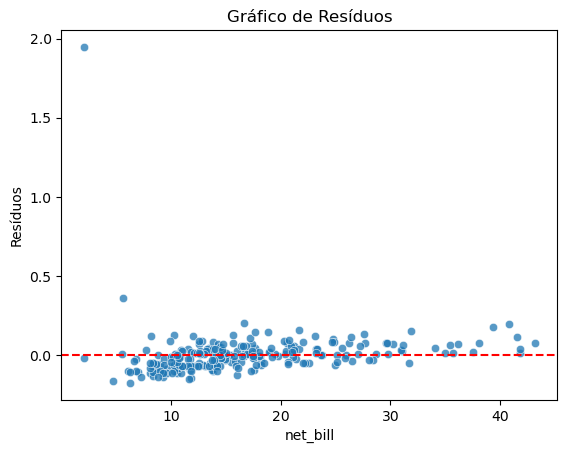

In [15]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x=tips['net_bill'], y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()



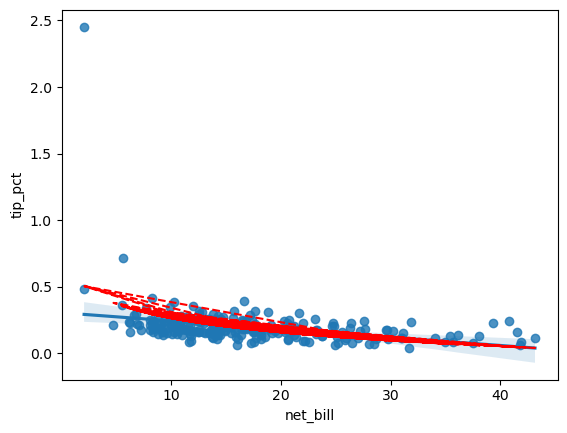

In [4]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')
plt.show()



###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Tue, 14 May 2024   Prob (F-statistic):           0.000297
Time:                        20:24:36   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

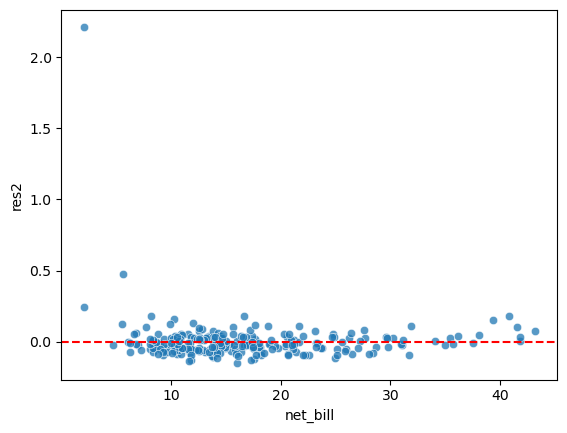

In [11]:
reg2 = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips).fit()
print(reg2.summary())
tips['res2'] = reg2.resid

sns.scatterplot(x=tips['net_bill'], y='res2', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')


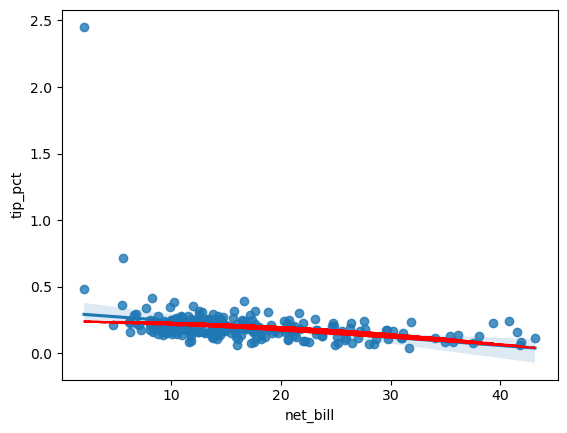

In [6]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], reg2.fittedvalues, 'r,--')
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 14 May 2024   Prob (F-statistic):           8.27e-16
Time:                        20:23:22   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

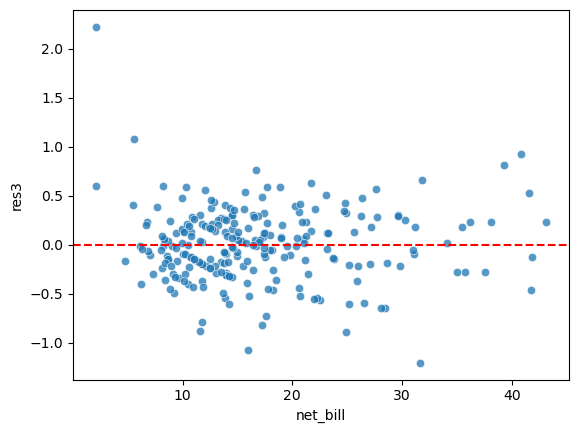

In [7]:
reg3 = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg3.summary())
tips['res3'] = reg3.resid

sns.scatterplot(x=tips['net_bill'], y='res3', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

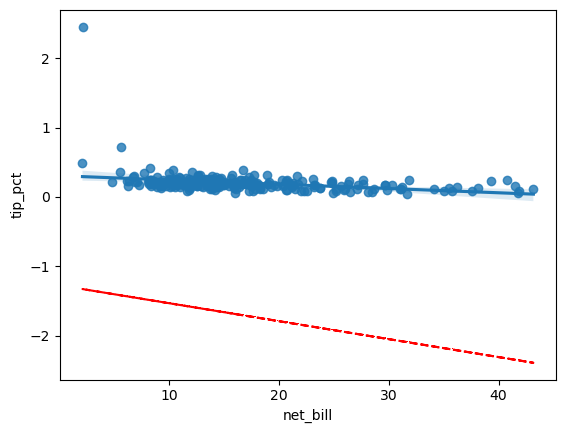

In [8]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], reg3.fittedvalues, 'r,--')
plt.show()


In [19]:
tips['pred_tip_pct'] = np.exp(reg3.fittedvalues)

tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.11440988592529763

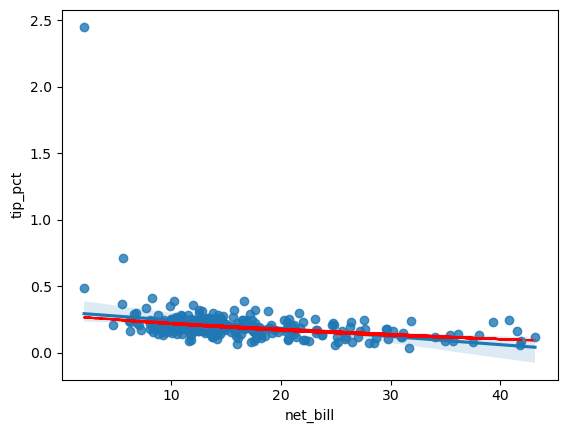

In [21]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.20e-20
Time:                        21:53:15   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

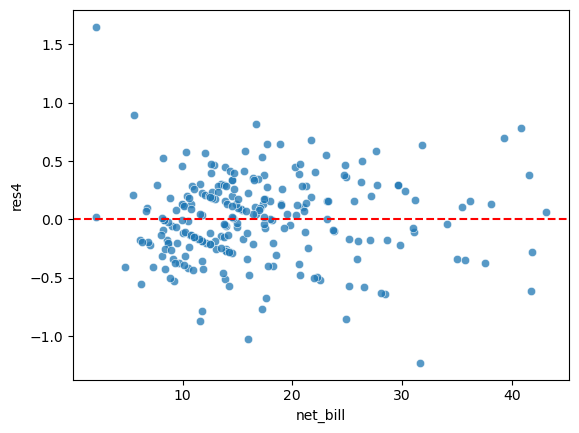

In [25]:
reg4 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg4.summary())
tips['res4'] = reg4.resid

sns.scatterplot(x=tips['net_bill'], y='res4', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

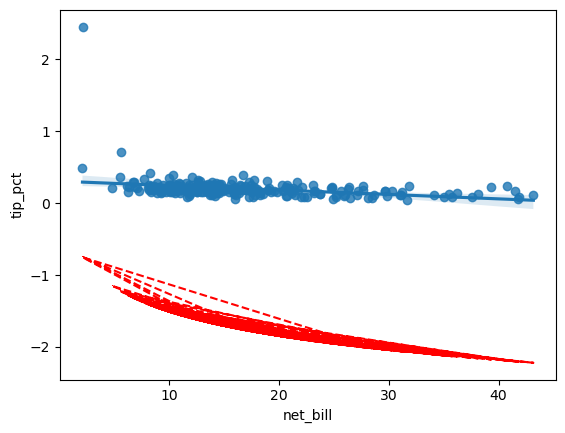

In [26]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], reg4.fittedvalues, 'r,--')
plt.show()


In [27]:
tips['pred_tip_pct2'] = np.exp(reg4.fittedvalues)

tips[['pred_tip_pct2', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322276

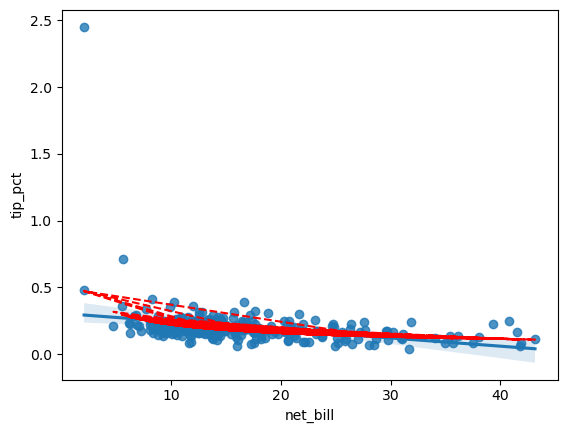

In [28]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct2'], 'r,--')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

 O modelo log do tip_pct em função do log de net_bill apresentou o melhor ajuste pois teve o R² mais alto